In [5]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
%matplotlib inline

# Watson Distribution

In [2]:
from watson_distribution import DimrothWatson

## Probabiulity Distribution Function (PDF)

In this section I demonstrate the effect of the shape parameter, k, on the pdf.  

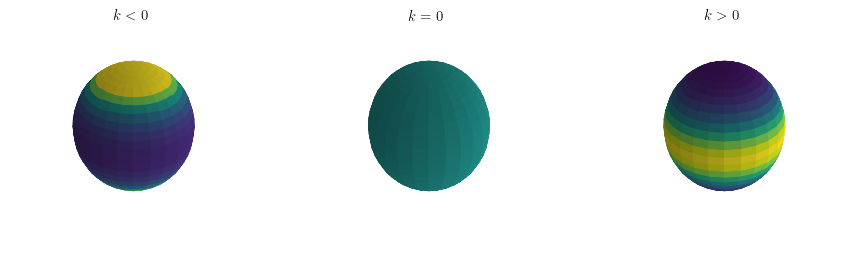

In [105]:
rv = DimrothWatson()

# sample polar coordimnates
theta = np.linspace(0, np.pi, 25)
phi = np.linspace(0, 2*np.pi, 25)
phi, theta = np.meshgrid(phi, theta)

# cartesian coordinates of the unit sphere
r = 1.0
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# set up a figure
fig = plt.figure(figsize=(15.0,4.5))

# calculate the pdf for given k<0
fcolors = rv.pdf(np.cos(theta), k=-3)
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.set_title(r'$k<0$', fontsize=15)
ax.plot_surface(x, y, z,  rstride=1, cstride=1,
                facecolors=cm.viridis(fcolors))
ax.set_axis_off()

# calculate the pdf for given k=0
fcolors = rv.pdf(np.cos(theta), k=0)
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.set_title(r'$k=0$', fontsize=15)
ax.plot_surface(x, y, z,  rstride=1, cstride=1,
                facecolors=cm.viridis(fcolors))
ax.set_axis_off()

# calculate the pdf for given k>0
fcolors = rv.pdf(np.cos(theta), k=3)
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.set_title(r'$k>0$', fontsize=15)
ax.plot_surface(x, y, z,rstride=1, cstride=1,
                facecolors=cm.viridis(fcolors))
ax.set_axis_off()

plt.show()

fig.savefig('./pdf_plot.png', dpi=250)

## Sampling

Here I show how to sample from a Watson distribution with different values for k.

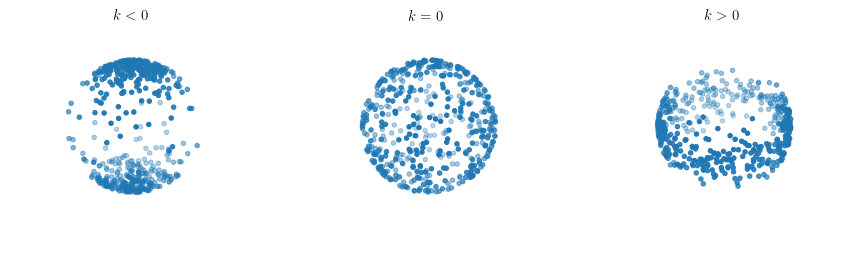

In [90]:
rv = DimrothWatson()

# set up a figure
fig = plt.figure(figsize=(15.0,4.5))


# sample polar coordimnates
theta = np.arccos(rv.rvs(k=-5, size=500))
phi = np.random.random(size=500)*np.pi*2

# cartesian coordinates of the unit sphere
r = 1.0
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.set_title(r'$k<0$', fontsize=15)
ax.scatter(x, y, z)
ax.set_axis_off()
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

# sample polar coordimnates
theta = np.arccos(rv.rvs(k=0, size=500))
phi = np.random.random(size=500)*np.pi*2

# cartesian coordinates of the unit sphere
r = 1.0
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.set_title(r'$k=0$', fontsize=15)
ax.scatter(x, y, z)
ax.set_axis_off()
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

# sample polar coordimnates
theta = np.arccos(rv.rvs(k=10, size=500))
phi = np.random.random(size=500)*np.pi*2

# cartesian coordinates of the unit sphere
r = 1.0
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.set_title(r'$k>0$', fontsize=15)
ax.scatter(x, y, z)
ax.set_axis_off()
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

plt.show()

## Parameter Fitting

In this section, I show how to use the built in scipy fitting feature to get a maximum liklihood estimate for the shape parameter.

In [104]:
rv = DimrothWatson()

cos_theta = rv.rvs(k=-5, size=500)
estimate_for_k, loc, scale = rv.fit(cos_theta, floc=0, fscale=1)
print("Estimate for a k={0} Watson distributoion, sampled using {1} points: {2}".format(-5,500,estimate_for_k))

cos_theta = rv.rvs(k=0, size=500)
estimate_for_k, loc, scale = rv.fit(cos_theta, floc=0, fscale=1)
print("Estimate for a k={0} Watson distributoion, sampled using {1} points: {2}".format(0,500,estimate_for_k))

cos_theta = rv.rvs(k=5, size=500)
estimate_for_k, loc, scale = rv.fit(cos_theta, floc=0, fscale=1)
print("Estimate for a k={0} Watson distributoion, sampled using {1} points: {2}".format(5,500,estimate_for_k))

Estimate for a k=-5 Watson distributoion, sampled using 500 points: -5.25166015625
Estimate for a k=0 Watson distributoion, sampled using 500 points: 0.0755859375
Estimate for a k=5 Watson distributoion, sampled using 500 points: 5.40654296875
